<a href="https://colab.research.google.com/github/srodriguez5500/Python_Foundations-FoodHub_Order/blob/main/FoodHub_Data_Analysis_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.1.4 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to restrict the float value to 3 decimal places
pd.set_option('display.float_format',lambda x:'%.3f' % x)

#show seaborn graphs inline
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
df=pd.read_csv('/content/drive/MyDrive/UT Austin Data Analytics Files/Projects/Project 1 - Numpy Pandas, Data Vis, EDA; FoodHub/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
- There are 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- The numerical columns include order ID, customer ID, cost of the order, food preparation time and delivery time.
- It is noted that although customer ID and order ID are of the integer type, they technically are categorical values.
- Day of the week, restaurant name, cuisine type and rating are of the data type object.
- The data type for ratings is object and can be easier evaluated if it were of data type, float.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#find null values
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [ ]:
#replace "Not given" values with NaN
df['rating'] = df['rating'].replace(['Not given'],np.nan)

#change rating column to data type float
df['rating'] = df['rating'].astype(float)


#### Observations:
-  There are no missing values however, we can see in the statistical summary that there are 736 orders that were not given a rating.
- We will change "Not given" entries to NaN and then change the data type of the column to float 64 for easier analysis.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.000,NaN,NaN,NaN,4.344,0.741,3.000,4.000,5.000,5.000,5.000
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:
- Once an order is placed, the time it takes to prepare the food ranges from 20-35 minutes, with an average preparation time of 27.37 minutes.
- The columns of food preparation time and delivery time have mean and median values that are close together, indicating a symmetrical distribution.
- 50% of the rated orders have 5 star ratings.
- The lowest rating given was a 3.
- 71% of the orders are made on weekends.
- 31% of the orders are of the American cuisine type, making it the most frequently chosen cuisine type.
- It is observed that Shake Shack is the most popular restaurant, being chosen 12% of the time.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df['rating'].value_counts(dropna=False)

,count
rating,
NaN,736
5.000,588
4.000,386
3.000,188


#### Observations:
- 736 orders were not given a rating.
- "Not given" entries were changed to NaN.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) **[9 marks]**

**We will begin by exploring numerical columns.**

**Observations on delivery time.**

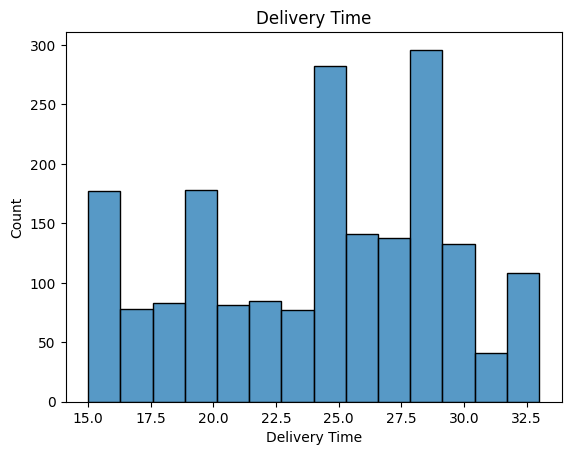

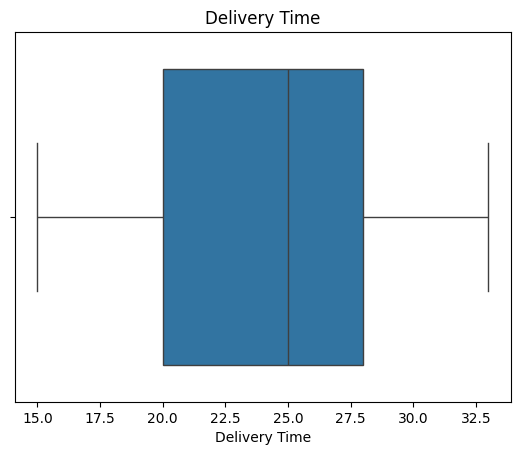

In [ ]:
#hist plot and box plot
sns.histplot(data=df, x='delivery_time')
plt.title('Delivery Time')
plt.xlabel('Delivery Time')
plt.show();

sns.boxplot(data=df,x='delivery_time')
plt.title('Delivery Time')
plt.xlabel('Delivery Time')
plt.show();

- Delivery time appears to be multimodal, where the two most common delivery time frames are 24-25 minutes and 28-29 minutes.
- The other most common delivery time frames are 15-16 minutes and 19-20 minutes.
- 50% of the orders have a wait time between 20 and 28 minutes.
- The median wait time is 25 minutes and is very close to the mean.
-  No outliers exist in this column, meaning the delivery time can be more accurately predicted.

**Observations on food preparation time.**

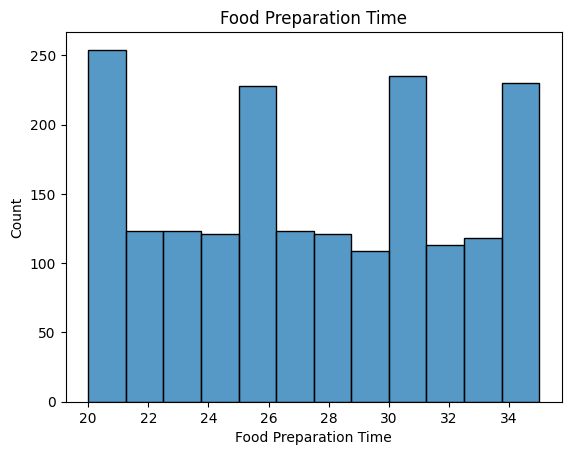

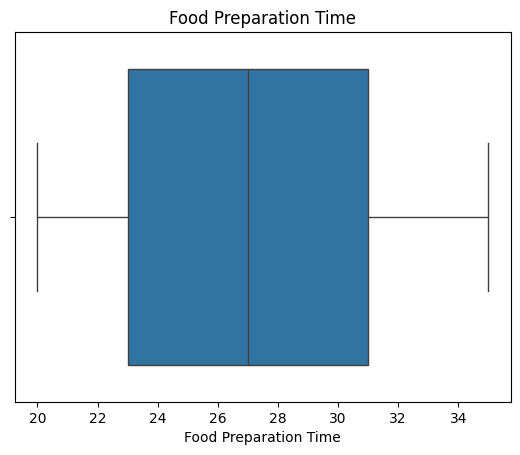

In [ ]:
#histplot and boxplot
sns.histplot(data=df, x='food_preparation_time')
plt.title('Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.show();

sns.boxplot(data=df, x='food_preparation_time')
plt.title('Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.show();

- The most common food preparation times are around 20 minutes, 25 minutes, 30 minutes and 35 minutes.
- The median time is 27 minutes.
- There are no outliers, so this data is fairly predictable.
- The shortest food preparation time is 20 minutes and the longest wait time is 35 minutes.

**Observations on cost of the order.**

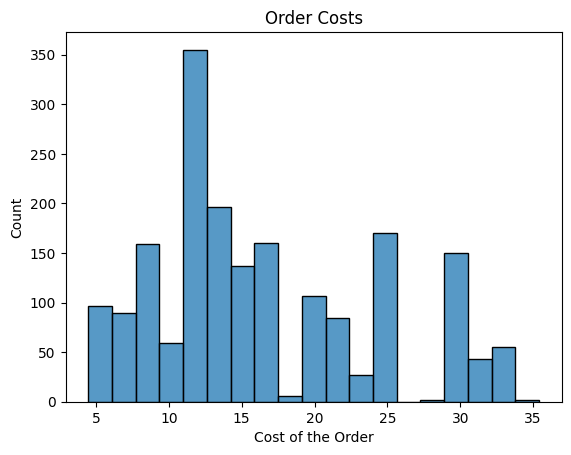

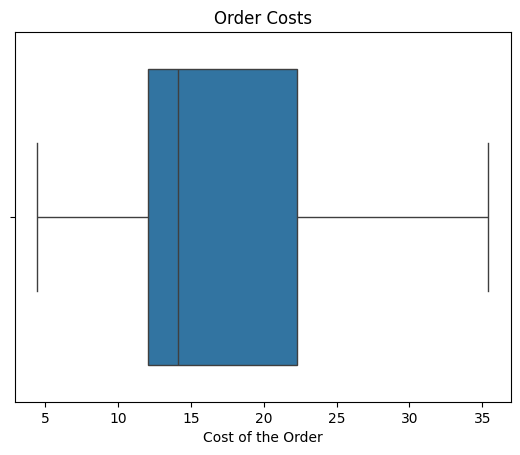

In [ ]:
#histplot and boxplot
sns.histplot(data=df,x='cost_of_the_order')
plt.title('Order Costs')
plt.xlabel('Cost of the Order')
plt.show();

sns.boxplot(data=df,x='cost_of_the_order')
plt.title('Order Costs')
plt.xlabel('Cost of the Order')
plt.show();

In [ ]:
#lowest cost of an order
df['cost_of_the_order'].min()

4.47

In [ ]:
#highest cost of an order
df['cost_of_the_order'].max()

35.41

- The cost of an order ranges from 4.47 - 35.41 dollars.
- The median cost of the order is 14 dollars, which is very close to the mean value of 16.49 dollars. This indicates that the cost of the orders are consistent and predictable.
- There are no outliers present.
- The most common cost range of an order is between 11-13 dollars.
- 75% of the orders are 12 dollars and over.

**We will now explore categorical data.**

**Observations on rating.**

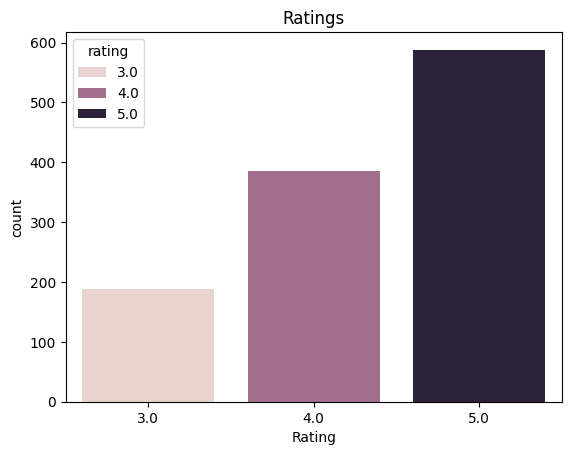

In [ ]:
#countplot
sns.countplot(data=df, x='rating', hue='rating')
plt.title('Ratings')
plt.xlabel('Rating')
plt.show();

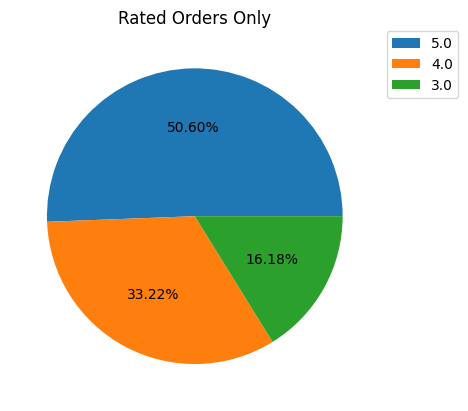

In [ ]:
#pie chart displaying rating percentages for rated orders only
rated_only=df['rating'].value_counts().plot(kind='pie',autopct='%.2f%%', title='Rated Orders Only', legend=True, labeldistance=None, ylabel='')
rated_only.legend(bbox_to_anchor=(1, 1.02), loc='upper left');

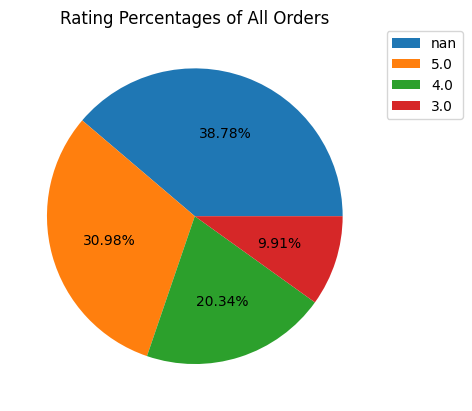

In [ ]:
#pie chart displaying rating percentages for all orders
all_orders=df['rating'].value_counts(dropna=False).plot(kind='pie',autopct='%.2f%%', title='Rating Percentages of All Orders', legend=True, labeldistance=None, ylabel='');
all_orders.legend(bbox_to_anchor=(1, 1.02), loc='upper left');

**Explore null ratings.**

In [ ]:
#pull statistical summary for only null ratings to identify any trends
df.loc[df['rating'].isnull()==True].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,736.000,NaN,NaN,NaN,1477457.383,548.114,1476551.000,1476971.250,1477449.000,1477925.500,1478441.000
customer_id,736.000,NaN,NaN,NaN,169951.231,112404.907,1311.000,79245.000,128600.000,263669.250,405334.000
restaurant_name,736,134,Shake Shack,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,736,14,American,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,736.000,NaN,NaN,NaN,16.085,7.328,4.660,11.828,14.070,21.500,34.190
day_of_the_week,736,2,Weekend,529,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,736.000,NaN,NaN,NaN,27.357,4.563,20.000,23.000,27.000,31.000,35.000
delivery_time,736.000,NaN,NaN,NaN,24.174,5.041,15.000,20.000,25.000,28.000,33.000


- 39% of *all orders* were not given a rating.
- 50% of *all rated* orders were given a 5.
- The lowest rating of any order was a 3.
- For non-rated orders only:
  - Weekend orders make up 72% of all non-rated orders.
  - Shake shack has the highest amount of orders with no rating. Although it is the highest, it only makes up 12% of all non-rated orders.
  - 29% of non-rated orders have an American cuisine type.

**Observations on day of the week.**

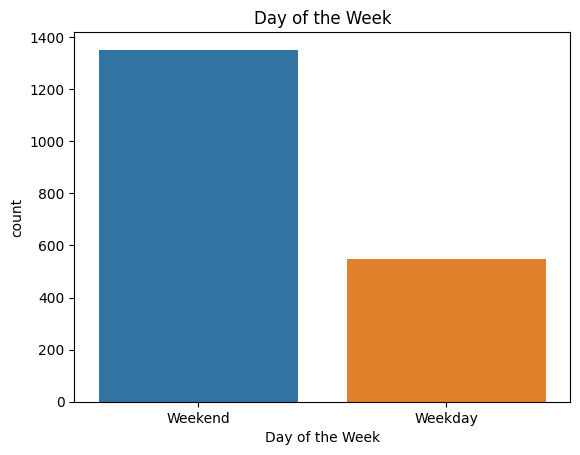

In [ ]:
#countplot
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week')
plt.title('Day of the Week')
plt.xlabel('Day of the Week')
plt.show()

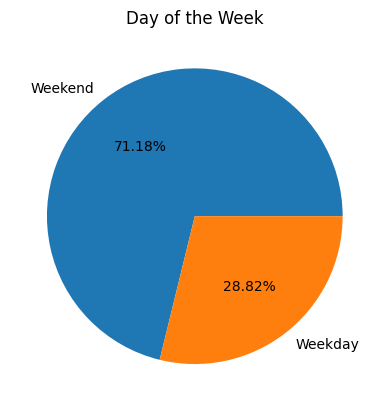

In [ ]:
#pie chart to show percentages
d_wk=df['day_of_the_week'].value_counts().plot(kind='pie', autopct='%.2f%%', title='Day of the Week',ylabel='')

- 71% of the orders were made on weekends.

**Observations on cuisine type.**

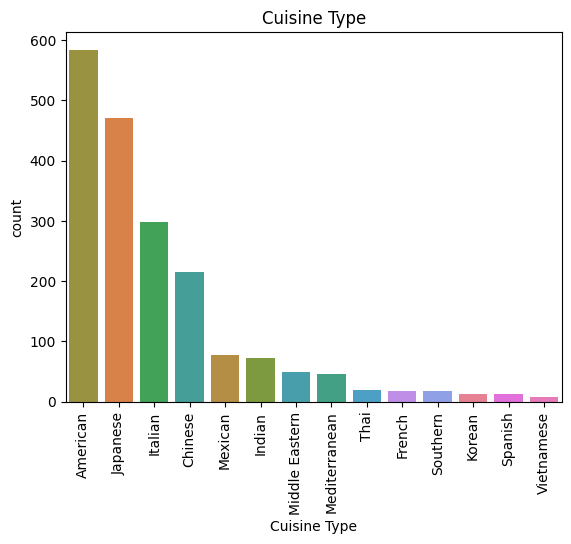

In [ ]:
#countplot
sns.countplot(data=df, x='cuisine_type',hue='cuisine_type', order=df['cuisine_type'].value_counts(ascending=False).index)
plt.xticks(rotation=90)
plt.title('Cuisine Type')
plt.xlabel('Cuisine Type')
plt.show();

- American cuisine is the most frequently chosen cuisine type, occupying 31% of the orders. Japanese and Italian come in second and third, respectively.
- Vietnamese, Spanish and Korean cuisines are chosen the least.

**Observations on restaurant name.**

In [ ]:
#identify how many restaurants there are
df['restaurant_name'].nunique()

178

- Find the top 5 restaurants with the most orders.

In [ ]:
#calculate order distribution for each restaurant
df['restaurant_name'].value_counts(normalize=True)

,proportion
restaurant_name,
Shake Shack,0.115
The Meatball Shop,0.070
Blue Ribbon Sushi,0.063
Blue Ribbon Fried Chicken,0.051
Parm,0.036
...,...
Sushi Choshi,0.001
Dos Caminos Soho,0.001
La Follia,0.001


- Find how many restaurants have only one order.

In [ ]:
#count observations of each restaurant
rst_ct = df['restaurant_name'].value_counts()

#find restaurants with one order
one_order=rst_ct[rst_ct==1]

#count how many there are total
one_order.shape[0]

50

- Out of 178 restaurants, the top 5 most frequently used are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.
- Out of 178 restaurants, there are 50 restaurants that have only 1 order.

**Observations on customer id.**

In [ ]:
#return how many different customers there are
df['customer_id'].nunique()

1200

- There are 1200 different customers recorded.
- We will find top 5 customers with the most orders and how many customers only ordered once.

In [ ]:
# count how many orders each customer placed
customer_orders = df['customer_id'].value_counts()

#find customers with one order
cust_one=customer_orders[customer_orders==1]

#count how many there are total
cust_one.shape[0]

784

In [ ]:
# top 5 customers who have placed the most orders
customer_orders.head()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


- 784 out of 1200 customers (65%) only ordered once.  
- The top 5 customers with the most orders have placed 13, 10, 9, 8, 7 orders respectively.

**Observations on order id.**

In [ ]:
#calculate how many orders there are
df['order_id'].nunique()

1898

- There are a total of 1898 orders recorded.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#count number of orders per restaurant
df['restaurant_name'].value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


#### Observations:
- Out of 178 restaurants, the top 5 most frequently used are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#find weekend orders
weekend_orders=df[df['day_of_the_week']=='Weekend']

#sort weekend orders by cuisine type
weekend_orders['cuisine_type'].value_counts().head()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
- The most popular cuisine on weekends is American cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#find orders that cost more than 20
over_20=df[df['cost_of_the_order']>20]

In [ ]:
#divide number of orders over 20 by the total number of orders and multiply by 100
round(over_20.shape[0]/df.shape[0] * 100,2)

29.24

#### Observations:
- 29.24% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# calculate mean delivery time
round(df['delivery_time'].mean(),2)

24.16

#### Observations:
- The mean delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# count number of orders and sort in descending order
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
- The top 3 customer IDs are as follows:
  - ID # 52832 with 13 orders.
  - ID # 47440 with 10 orders.
  - ID # 83287 with 9 orders.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) **[10 marks]**



- We will begin by first performing **bivariate analyses** to identify any correlations we can further explore.
- We will add a column that calculates the total time it takes to get the order delivered, from the time the order is placed.

In [ ]:
# create a column of total time
df['total_time']=df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5.000,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3.000,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4.000,25,24,49


<Axes: >

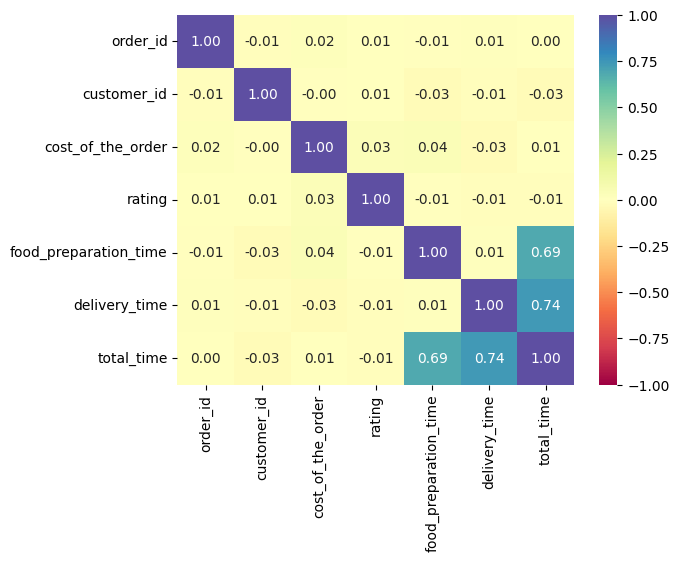

In [ ]:
#plot the heatmap for numerical variables
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt='.2f',cmap='Spectral')

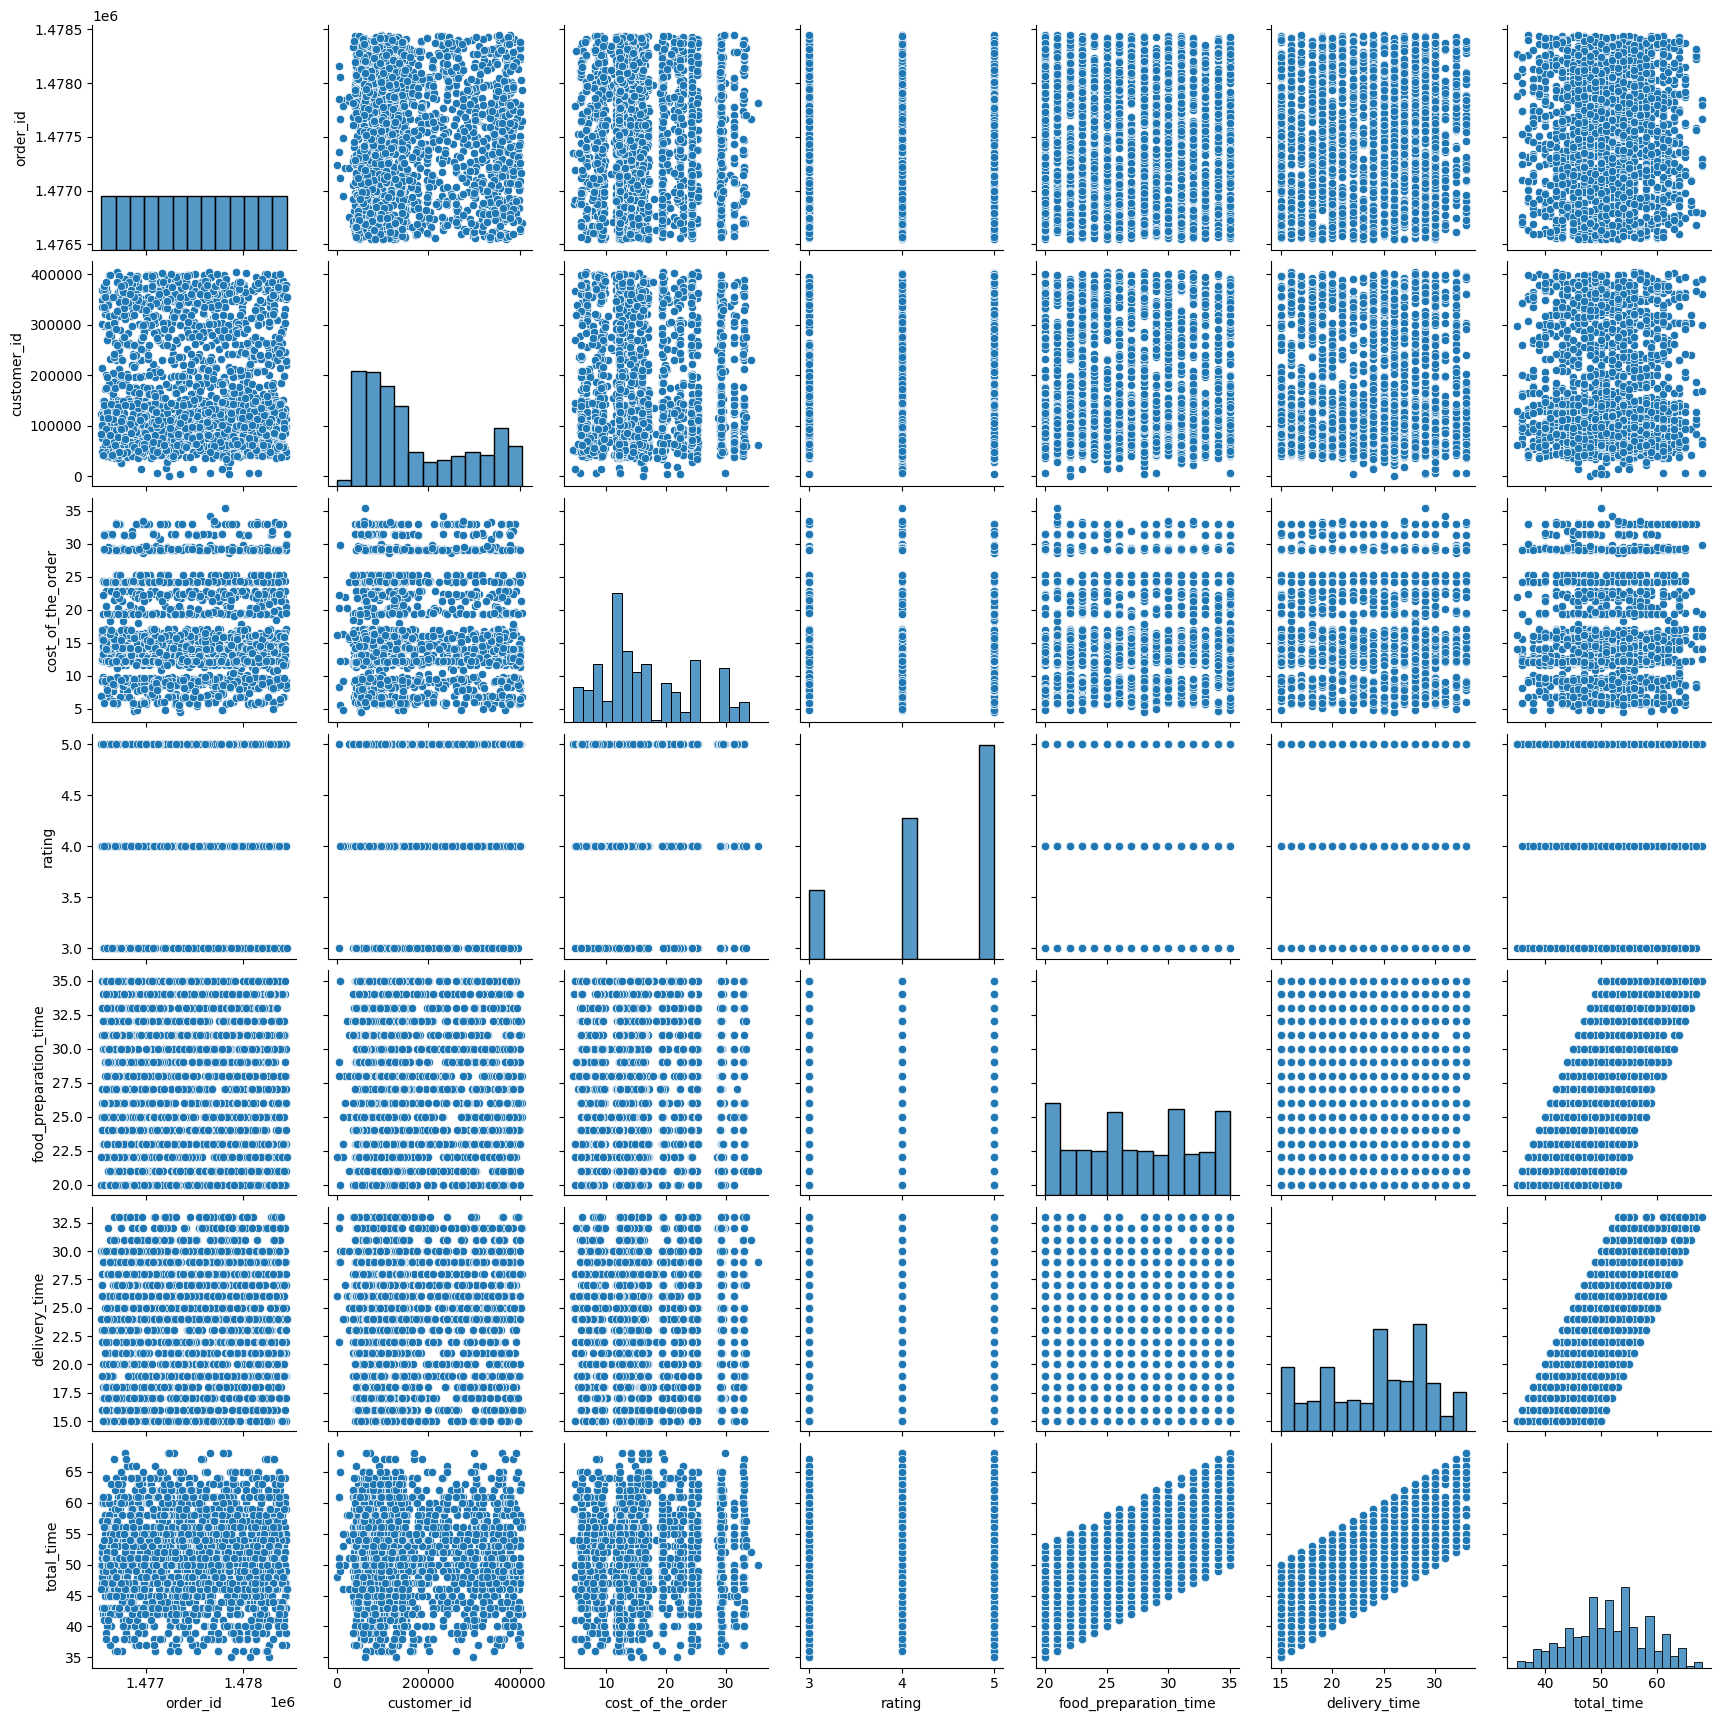

In [ ]:
#generate a pairplot for numerical variables
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

- The only strong correlations are food preparation time and total time, as well as delivery time and total time, which is expected since one variable is comprised of the other.

**Multivariate Analysis**

**Cuisine type and rating.**

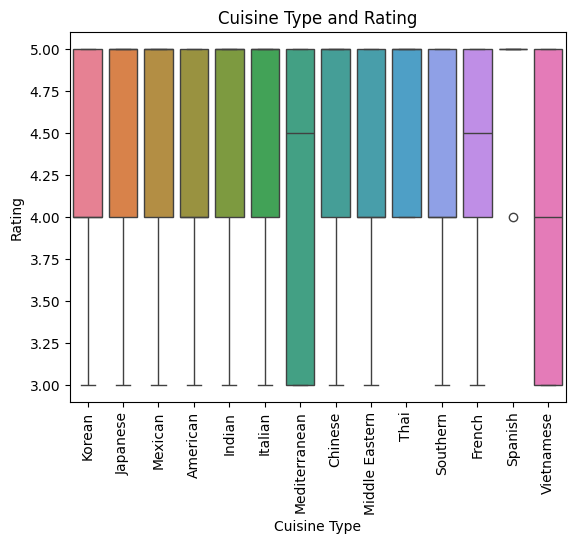

In [ ]:
#boxplot
sns.boxplot(data=df,x='cuisine_type',y='rating',hue='cuisine_type')
plt.title('Cuisine Type and Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.xticks(rotation=90);

- We can see that much of the data is highly left skewed. We will construct a barplot to get more insight.

In [ ]:
#groupby cuisine type
#find mean rating and sort high to low
cuisine_avg_rt = df.groupby(['cuisine_type'])['rating'].mean().sort_values(ascending=False).reset_index()

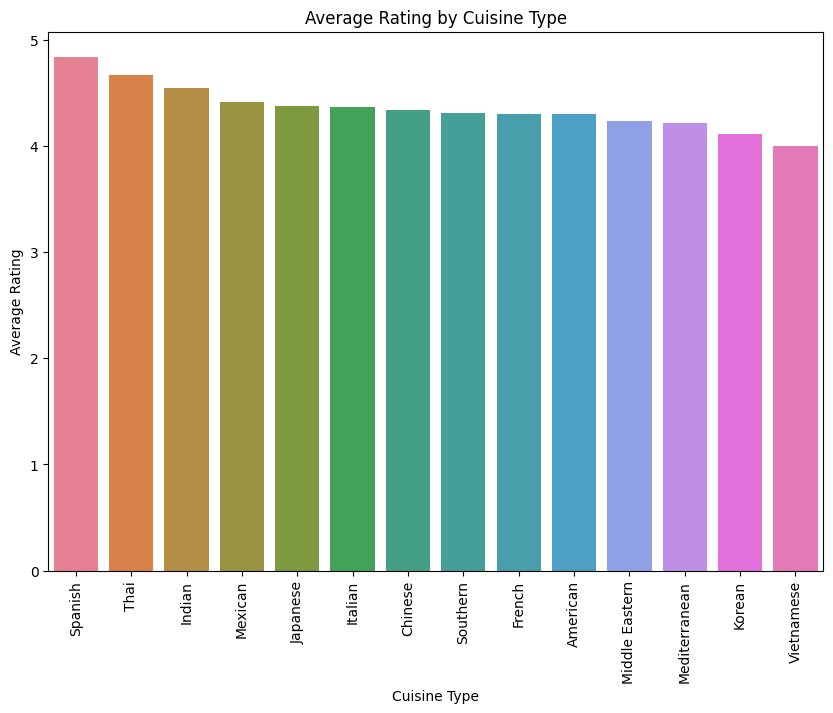

In [ ]:
#graph average rating and cuisine type
plt.figure(figsize=(10,7))
sns.barplot(data=cuisine_avg_rt, x='cuisine_type', y='rating', hue='cuisine_type');
plt.xticks(rotation=90)
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.show();

- Although Spanish cuisine has the highest average rating, it is important to note that it is among the bottom 3 cuisines, that have the least amount of orders.
- Thai cuisine also has a high average rating but has a low number of orders.
- Vietnamese cuisine has an average rating above 4, but is still the lowest average rating and lowest amount of orders.

**Cuisine Type and Total Time (delivery_time + food_preparation_time)**

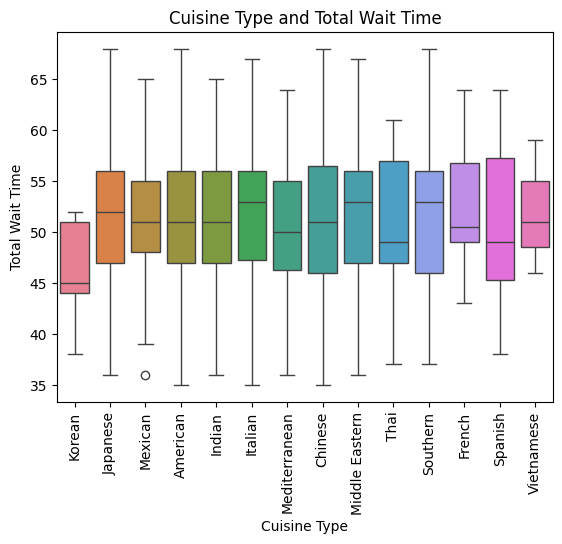

In [ ]:
#boxplot of total time and cuisine type
sns.boxplot(data=df, x='cuisine_type', y='total_time', hue='cuisine_type')
plt.xticks(rotation=90)
plt.title('Cuisine Type and Total Wait Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Wait Time');

- Italian, Middle Eastern and Southern cuisines have the highest median total wait times, with over 50% of the orders taking more than 53 minutes total.
- It was noted previosuly that Italian cuisine is still almong the top 3 most frequently utilized cuisines.
- Korean, Thai and Spanish cuisines have the lowest median total wait times.
- Recall that Korean and Spanish cuisine were among the lowest frequently used cuisine types.
- Generally, cuisines with the highest amount of orders have a longer median **total wait time**.
- We will breakdown total wait time by analyzing delivery time and preparation time separately.

**Cuisine type and delivery time.**

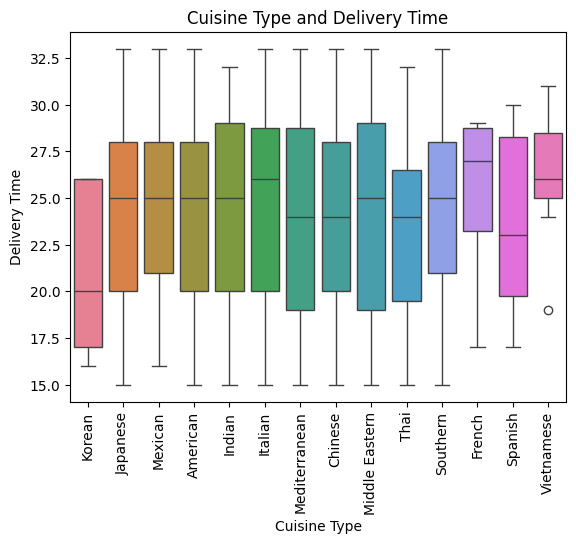

In [ ]:
#generate boxplot with cuisine type and delivery time
sns.boxplot(data=df, x='cuisine_type', y='delivery_time', hue='cuisine_type')
plt.xticks(rotation=90)
plt.title('Cuisine Type and Delivery Time')
plt.xlabel('Cuisine Type')
plt.ylabel('Delivery Time');

- Korean and Spanish cuisines still have the lowest median delivery times.
- Vietnamese and French cuisines have higher median delivery times and have the lowest average rating.

**Cuisine type and food preparation time.**

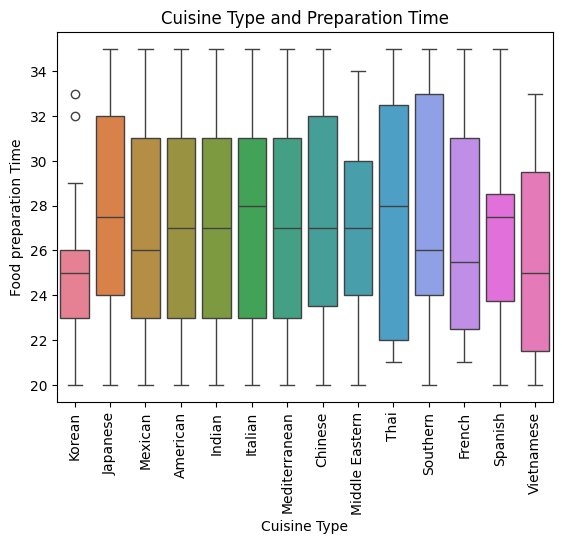

In [ ]:
#generate boxplot with cuisine type and preparation time
sns.boxplot(data=df,x='cuisine_type', y='food_preparation_time', hue='cuisine_type')
plt.title('Cuisine Type and Preparation Time')
plt.xticks(rotation=90)
plt.xlabel('Cuisine Type')
plt.ylabel('Food preparation Time');

- Vietnamese and Korean cuisines have the lowest median food preparation times.
- Italian, Thai and Spanish foods have the highest median food preparation times.

**Cuisine type and cost of an order.**

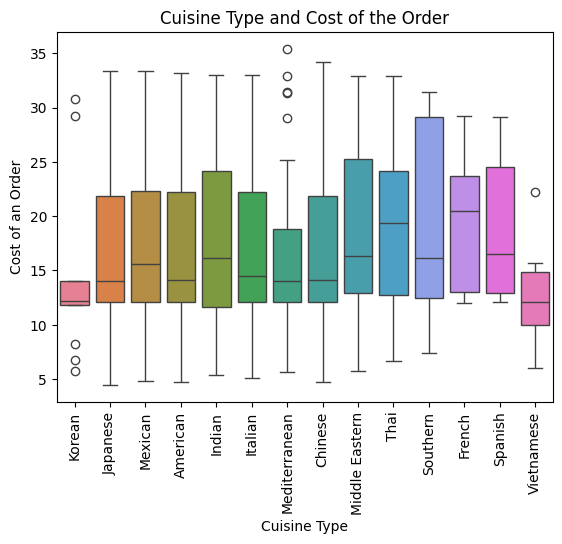

In [ ]:
#generate boxplot of cuisine type and cost of an order
sns.boxplot(data=df,x='cuisine_type', y='cost_of_the_order',hue='cuisine_type')
plt.title('Cuisine Type and Cost of the Order')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of an Order')
plt.xticks(rotation=90);

- We will generate a barplot of the mean cost of the order sorted by descending order.

In [ ]:
#group by cuisine type then sort average costs from high to low.
avg_cost_by_cuis = df.groupby(df['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending=False).reset_index()

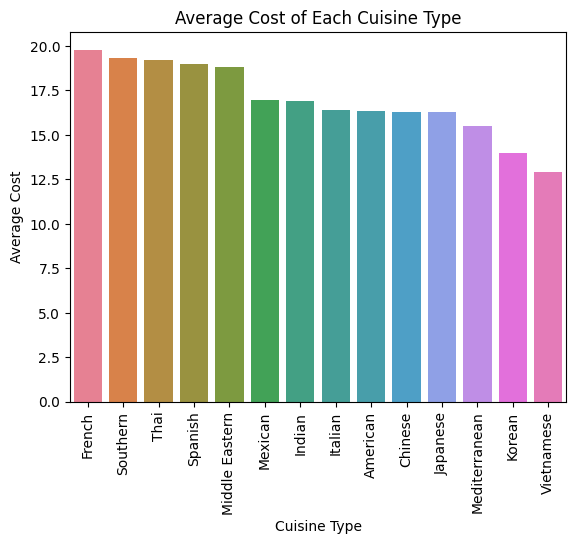

In [ ]:
#graph average cost and cuisine type
sns.barplot(data=avg_cost_by_cuis, x='cuisine_type', y='cost_of_the_order', hue='cuisine_type')
plt.xticks(rotation=90)
plt.title('Average Cost of Each Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Cost');

- French, Thai and Spanish cuisines have the highest median and average costs of an order.
- Korean and Vietnamese (among the least popular) cuisines have the lowest median and average cost of an order.
- The 3 most popular cuisine types (American, Japanese and Italian) have a median cost of around 14 dollars and an average cost of 16 dollars.

**Determine which cuisine type generates the most revenue.**

In [ ]:
#calculate total revenue and group by cuisine type
df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending=False)

,cost_of_the_order
cuisine_type,
American,9530.780
Japanese,7663.130
Italian,4892.770
Chinese,3505.620
Mexican,1303.850
Indian,1235.140
Middle Eastern,922.210
Mediterranean,711.840
Thai,364.950


- The top 5 cuisine types that generate the most revenue are American, Japanese, Italian, Chinese and Mexican.
- It is interesting that although Thai and Spanish cuisines have high average ratings, they generate a fairly low amount of revenue.

**Ratings and cost of the order.**

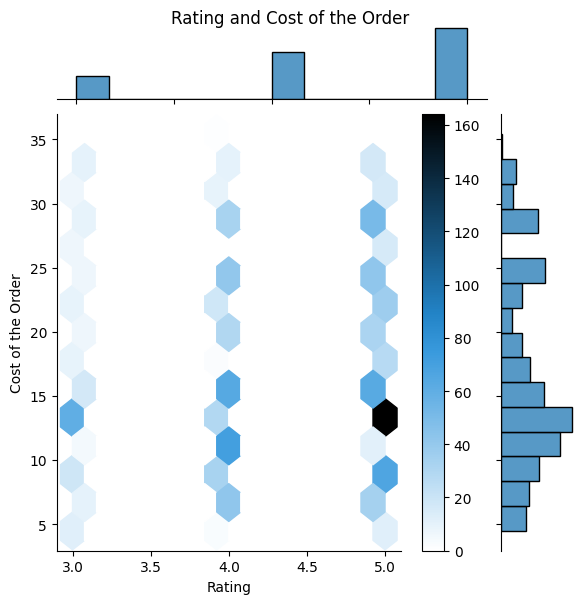

In [ ]:
#indicate frequency
sns.jointplot(data=df, x='rating', y='cost_of_the_order',kind='hex')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.suptitle('Rating and Cost of the Order',y=1)
plt.colorbar();

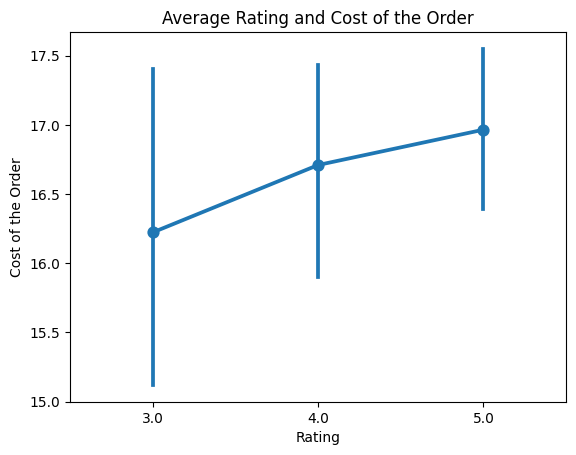

In [ ]:
#show mean cost with errorbar/confidence interval
sns.pointplot(data=df, x='rating', y='cost_of_the_order')
plt.title('Average Rating and Cost of the Order')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order');

- The highest frequency of 5 star orders have a cost between 13-15 dollars. Recall that the most popular cuisine types collectively had a median cost of around 14 dollars. These are also the cuisine types that generate the most revenue.
- The average cost of the orders is not a good source for analysis, given its wide confidence interval.

**Rating and total time (food prep time + delivery time).**

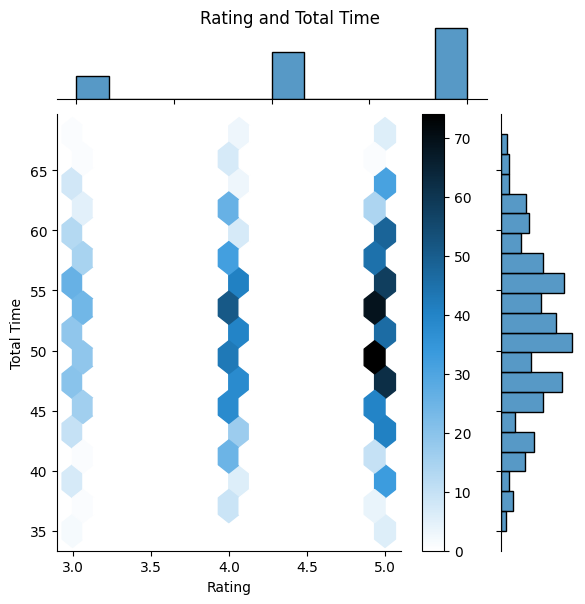

In [ ]:
#indicate frequency
sns.jointplot(data=df, x='rating', y='total_time',kind='hex')
plt.xlabel('Rating')
plt.ylabel('Total Time')
plt.suptitle('Rating and Total Time',y=1)
plt.colorbar();

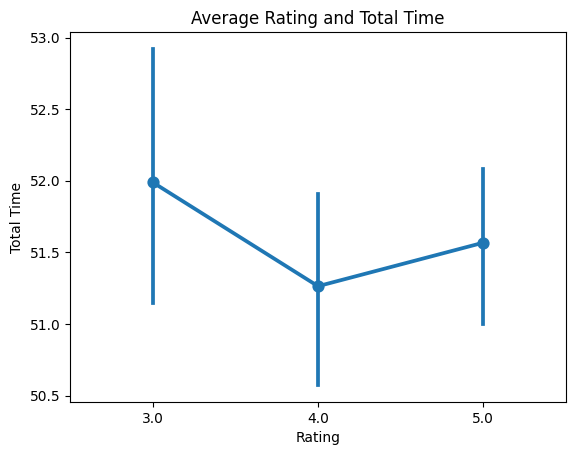

In [ ]:
#show mean cost with errorbar
sns.pointplot(data=df, x='rating', y='total_time')
plt.title('Average Rating and Total Time')
plt.xlabel('Rating')
plt.ylabel('Total Time');

- The highest concentration of 5 star ratings have a total wait time of approximately 50 minutes and approximately 53 minutes. This corresponds to the total wait times of the most popular cuisines, noted previously.
- Again, we have a wide confidence interval around the average food preparation time.
- We will exclude average times for food preparation time and delivery time analyses, due to the likelihood of having another wide confidence interval.

**Rating and food preparation time.**

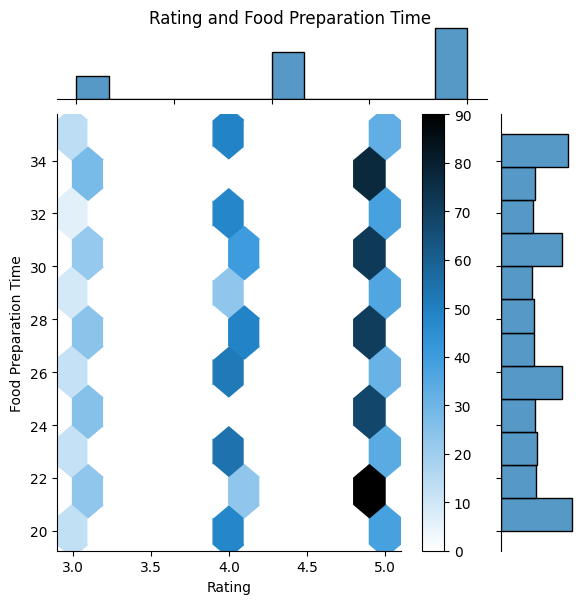

In [ ]:
#indicate frequency
sns.jointplot(data=df, x='rating', y='food_preparation_time',kind='hex')
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time')
plt.suptitle('Rating and Food Preparation Time',y=1)
plt.colorbar();

- The highest concentration of 5 star ratings have a preparation time between 21-23 minutes.
- Another high concentration of 5 star ratings have a preparation time between 33-35 minutes.
- Recall that popular cuisines had median wait times of around 27 minutes.

**Rating and delivery time.**

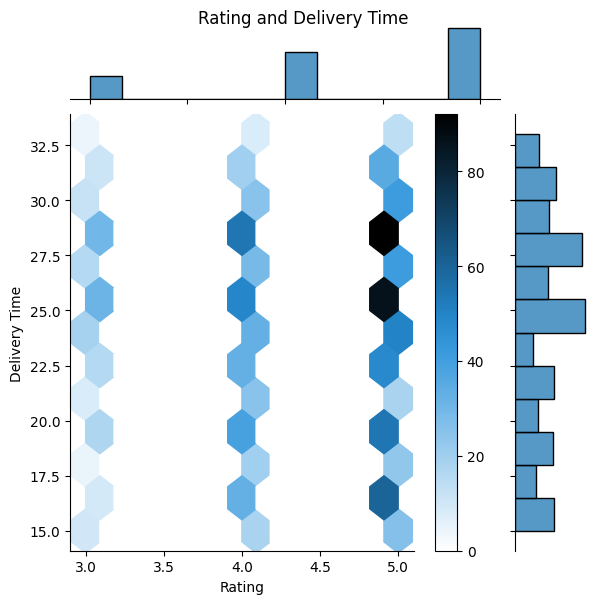

In [ ]:
#indicate frequency
sns.jointplot(data=df, x='rating', y='delivery_time',kind='hex')
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.suptitle('Rating and Delivery Time',y=1)
plt.colorbar();

- The highest concentration of 5 star ratings have a delivery time of about 26 minutes and about 28 minutes. These delivery times seem common among both most popular *and* least popular cuisine types.

**Restaurant and total revenue.**

In [ ]:
#find total revenue of each restaurant
rev_by_rst=df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False)
rev_by_rst

,cost_of_the_order
restaurant_name,
Shake Shack,3579.530
The Meatball Shop,2145.210
Blue Ribbon Sushi,1903.950
Blue Ribbon Fried Chicken,1662.290
Parm,1112.760
...,...
Market Table,6.790
Wa Jeal,6.740
Cipriani Le Specialita,5.920


- In reference to total revenue, we will analyze the top 5 restaurants.

In [ ]:
#create a list of top 5 restaurants in regards to total revenue
restaurants=['Shake Shack', 'The Meatball Shop','Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken','Parm']

#create a dataframe consisting only of high revenue restaurants
high_rev_rest = df[df['restaurant_name'].isin(restaurants)].reset_index(drop=True)

In [ ]:
#group high revenue restaurants by cuisine type
high_rev_rest['cuisine_type'].value_counts()

,count
cuisine_type,
American,335
Italian,180
Japanese,119


- The top 5 restaurants with the most revenue are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.
- These top 5 restaurants  correspond with the most popular cuisine types.

**Day of the week and total time.**

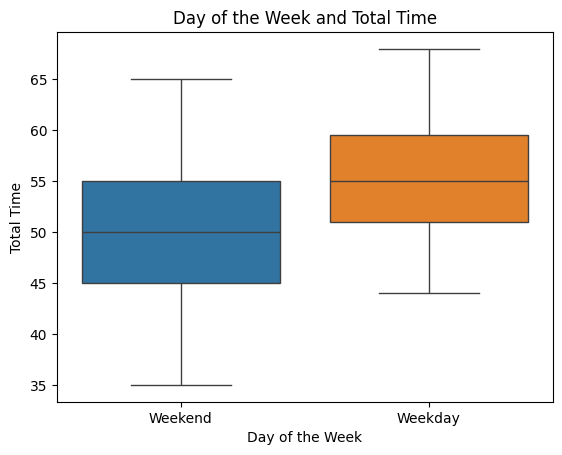

In [ ]:
#generate a boxplot with day of the week and total time
sns.boxplot(data=df, x='day_of_the_week', y='total_time', hue='day_of_the_week')
plt.title('Day of the Week and Total Time')
plt.xlabel('Day of the Week')
plt.ylabel('Total Time')
plt.show();

- It interesting to note that weekend orders seem to be completed faster than weekdays, despite having a significantly higher volume of orders.

**Day of the week and delivery time.**

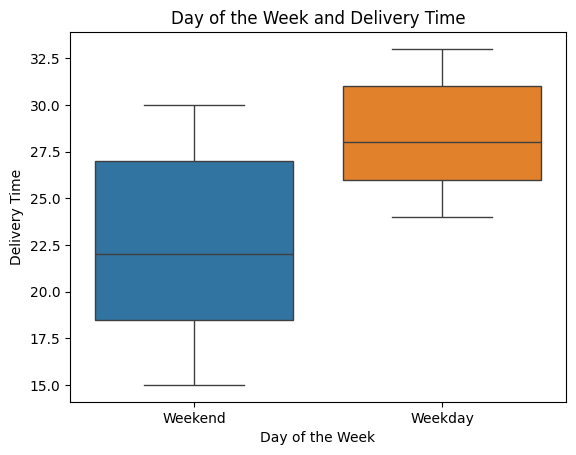

In [ ]:
#generate a boxplot with day of the week and delivery time
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', hue='day_of_the_week')
plt.title('Day of the Week and Delivery Time')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show();

- The delivery time is significantly faster on weekends than weekdays.

**Day of the week and food preparation time.**

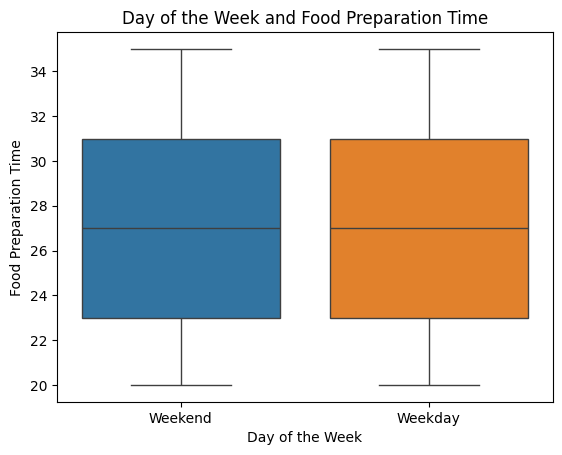

In [ ]:
#generate a boxplot with day of the week and prep time
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time', hue='day_of_the_week')
plt.title('Day of the Week and Food Preparation Time')
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time')
plt.show();

- It takes about the same time to prepare the food on weekends, as on weekdays.

**Rating and day of the week.**

- We want to include "Not given" entries so we will make a copy of the data frame and convert NaN values back to "Not given".
- After, we will generate a countplot.

In [ ]:
#make a copy of df
df_w_not_given=df.copy()

#replace nan with "Not given"
df_w_not_given['rating']=df_w_not_given['rating'].fillna('Not given')

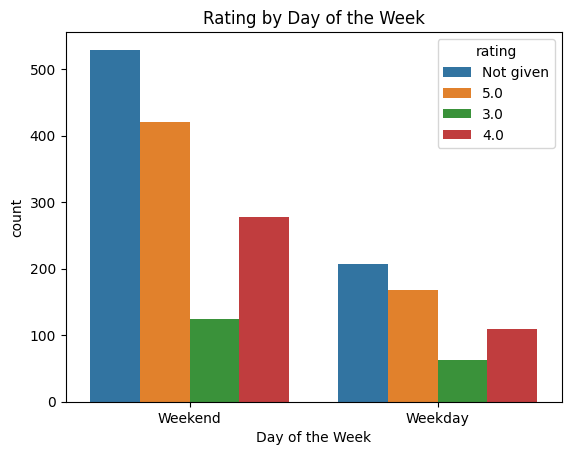

In [ ]:
#frequency of ratings by day of the week
sns.countplot(data=df_w_not_given, x='day_of_the_week', hue='rating')
plt.title('Rating by Day of the Week')
plt.xlabel('Day of the Week')
plt.show();

- The only significant difference in ratings on weekends and weekdays is the volume of ratings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#filter rated restaurants
rated = df[df['rating'].notna()]
rated['rating'].value_counts(dropna=False)

,count
rating,
5.000,588
4.000,386
3.000,188


In [ ]:
#calculate average ratings by restaurant
avg_rating = rated.groupby(['restaurant_name'])['rating'].mean().reset_index(name='average_rating')
avg_rating

,restaurant_name,average_rating
0,'wichcraft,5.000
1,12 Chairs,4.500
2,5 Napkin Burger,4.000
3,67 Burger,5.000
4,Amma,4.500
...,...,...
151,Zero Otto Nove,4.000
152,brgr,3.000
153,da Umberto,5.000
154,ilili Restaurant,4.154


In [ ]:
#calculate total number of ratings per restaurant
rating_ct = rated.groupby(['restaurant_name'])['rating'].count().reset_index(name='rating_count')
rating_ct

,restaurant_name,rating_count
0,'wichcraft,1
1,12 Chairs,2
2,5 Napkin Burger,2
3,67 Burger,1
4,Amma,2
...,...,...
151,Zero Otto Nove,1
152,brgr,1
153,da Umberto,1
154,ilili Restaurant,13


In [ ]:
#filter restaurants that have over 50 ratings
over_50 = rating_ct[(rating_ct['rating_count']>50)].reset_index(drop=True)
over_50.head()

,restaurant_name,rating_count
0,Blue Ribbon Fried Chicken,64
1,Blue Ribbon Sushi,73
2,Shake Shack,133
3,The Meatball Shop,84


In [ ]:
#join avg_rating and over_50
merged=over_50.merge(avg_rating, on ='restaurant_name', how='inner')
merged.head()

,restaurant_name,rating_count,average_rating
0,Blue Ribbon Fried Chicken,64,4.328
1,Blue Ribbon Sushi,73,4.219
2,Shake Shack,133,4.278
3,The Meatball Shop,84,4.512


#### Observations:
- The restaurants that meet the criteria for the promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#Add up orders that are larger than 20 dollars and multiply by 0.25
over_20 = df[(df['cost_of_the_order'] > 20)]['cost_of_the_order'].sum() * 0.25

#Add up orders larger than 5 dollars but less than or equal 20 and multiply by 0.15
over_5 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum() * 0.15

#Add total surcharges
net_rev = round(over_20 + over_5,2)
net_rev

6166.3

#### Observations:
- The net revenue generated by the company is 6166.30 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# total_time column was created previously

In [ ]:
#pull rows that have a total time of over 60 minutes
over_60 = df[(df['total_time']>60)]

#find percentage of orders with a total time of over 60 minutes
round((len(over_60) / len(df) * 100),2)

10.54

#### Observations:
- Approximately 10.54% of the orders have a delivery time of over 60 minutes, after the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby(['day_of_the_week'])['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340
Weekend,22.470


#### Observations:
- The average delivery time is longer during the week, than the average delivery time on the weekend.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) **[6 marks]**

### Conclusions:
-  The top 3 cuisine types that generate the highest revenues are American, Japanese and Italian.
- Some characteristics of the top 3 cuisines with the highest revenue are as follows:
  - The median total wait time is 51-53 minutes. This wait time is also associated with the highest concentration of 5 star ratings, in comparison to other wait times.
  - The median cost of the order is approximately 14 dollars. These costs fall within the cost range between 13-15 dollars, which are associated with the highest concentration of 5 star ratings, in comparison to other costs of an order.
- The bottom 3 cuisine types that generate the least amount of revenue are Spanish, Korean and Vietnamese.
- Some characteristics for the bottome 3 cuisines with the lowest revenue are as follows:
  - The median total wait times ranged from 45-51 minutes.
  - The median cost of the order ranged from 12.13 - 16.52 dollars.
- High ratings by cuisine type did not indicate high revenue or high number of orders. For example, Thai and Spanish cuisines have high ratings, yet generate low amounts of revenue due to their lack of popularity.
- The top 5 restaurants that generate the most revenue are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.
- Weekends have the highest volume of orders, making up 71% of the orders.
- Delivery time is slower during the weekday, than on weekends while the time it took to prepare the food at the restaurant, generally stayed the same.
- 65% of customers only ordered once.
- 39% of all orders were not given a rating.

### Recommendations:

- Contract more restaurants of American, Japanese and Italian cuisine types since they generate the most revenue and are most popular.
- Give incentives to staff for faster delivery times, to decrease overall wait times for customers, especially during weekdays.
- Give incentives to customers if they order during weekdays to increase the volume of orders during this time. An example could be guaranteeing customers a specific delivery time.
- Encourage customers to return by providing incentives such as a reward program or coupons.
- Give incentives for customers to leave a rating/review to get better insight on how the business can improve. This can be done also using a reward program.

In [ ]:
!jupyter nbconvert --to html Project_1_Full_Code.ipynb

[NbConvertApp] Converting notebook Project_1_Full_Code.ipynb to html
[NbConvertApp] Writing 3261157 bytes to Project_1_Full_Code.html


---